In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
amount = pd.read_csv('Insurance amount.csv')

In [3]:
amount.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
amount.isnull().sum() #### no null values observed

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
amount.shape

(9134, 26)

In [6]:
amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [7]:
amount.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
amount["Country"].unique()  # same country for all the rows can be dropped

array(['US'], dtype=object)

In [9]:
amount.drop(['Country'],axis=1,inplace = True)

In [10]:
amount.head()

,Customer,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [11]:
amount["Response"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
amount["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [13]:
amount["Coverage"].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [14]:
amount["EmploymentStatus"].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [15]:
amount["Policy Type"].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [16]:
amount["Policy"].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [17]:
amount["Vehicle Class"].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [18]:
amount["Location Code"].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [19]:
amount["Vehicle Size"].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [20]:
amount["Number of Policies"].unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5], dtype=int64)

In [21]:
amount["Claim Reason"].unique()

array(['Collision', 'Scratch/Dent', 'Hail', 'Other'], dtype=object)

In [22]:
amount["Sales Channel"].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [23]:
# from above analysis wwe can conclude that id is not important , country has only one value (not important),state and state code either one of them is enough we can drop any one of them


In [24]:
amount.columns

Index(['Customer', 'State Code', 'State', 'Claim Amount', 'Response',
       'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [25]:
amount.drop(['Customer',"State Code"],axis=1,inplace=True)

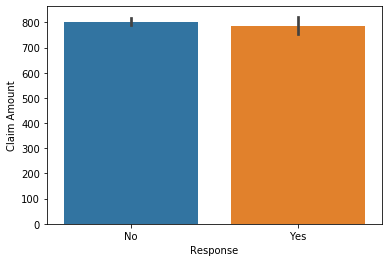

In [26]:
sns.barplot(x="Response",y="Claim Amount",data= amount)

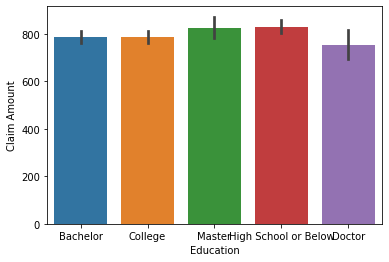

In [27]:
sns.barplot(x="Education",y="Claim Amount",data= amount) # master and high school & below gets quite same claim amount

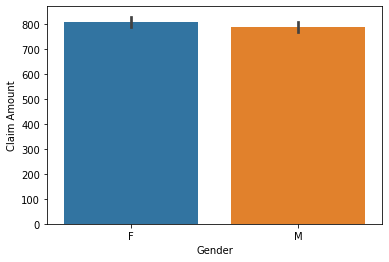

In [28]:
sns.barplot(x="Gender",y="Claim Amount",data= amount)  # female gets little more claim 

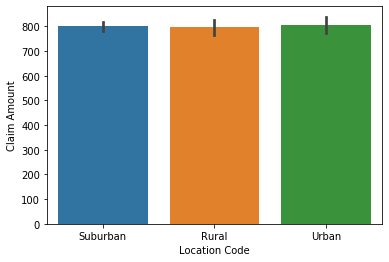

In [29]:
sns.barplot(x="Location Code",y="Claim Amount",data= amount)  # not much of a difference noticed

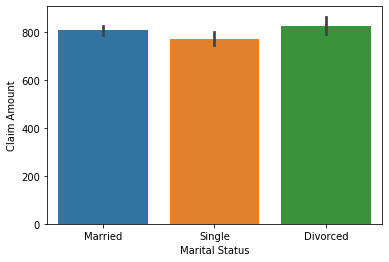

In [30]:
sns.barplot(x="Marital Status",y="Claim Amount",data= amount) # oddly divorced people get max claim

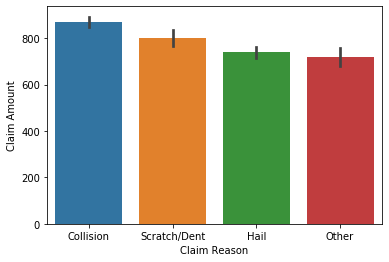

In [31]:
sns.barplot(x="Claim Reason",y="Claim Amount",data= amount) # collided vehicle gets max claim

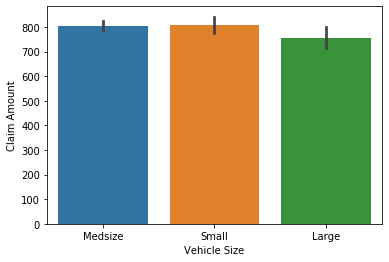

In [32]:
sns.barplot(x="Vehicle Size",y="Claim Amount",data= amount) # large vehicle gets less claim

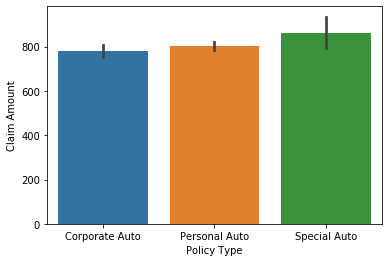

In [33]:
sns.barplot(x="Policy Type",y="Claim Amount",data= amount) # special auto gets max claim

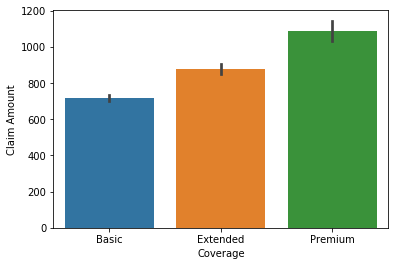

In [34]:
sns.barplot(x="Coverage",y="Claim Amount",data= amount) # premium policy gets max claim

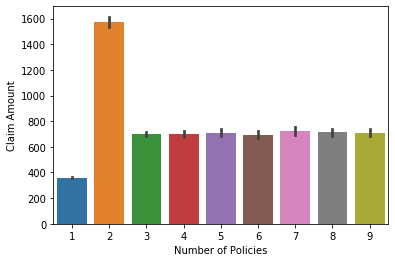

In [35]:
sns.barplot(x="Number of Policies",y="Claim Amount",data= amount) # 2 policies gets maximum claim

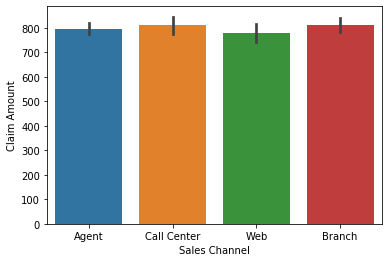

In [36]:
sns.barplot(x="Sales Channel",y="Claim Amount",data= amount)

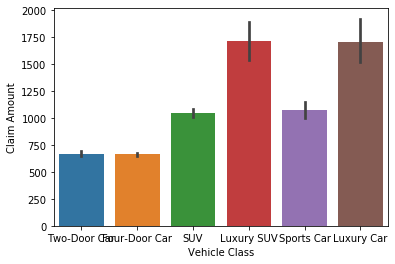

In [37]:
sns.barplot(x="Vehicle Class",y="Claim Amount",data= amount) #  luxury caars  gets max claim amount

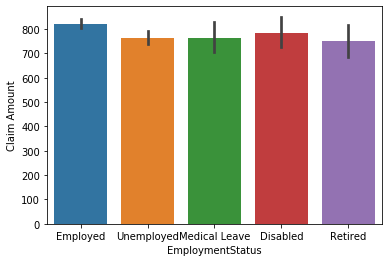

In [38]:
sns.barplot(x="EmploymentStatus",y="Claim Amount",data= amount) # employed gets max

In [39]:
amount["Education"].replace(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],[2,1,3,0,4],inplace = True)
amount["Claim Reason"].replace(['Collision', 'Scratch/Dent', 'Hail', 'Other'],[3,2,1,0],inplace = True)
amount['Vehicle Size'].replace(['Medsize',"Small",'Large'],[1,0,2],inplace = True)
amount["Policy Type"].replace(['Corporate Auto', 'Personal Auto', 'Special Auto'],[1,0,2],inplace = True)
amount["Coverage"].replace(['Basic', 'Extended', 'Premium'],[0,1,2],inplace = True)
amount["Response"].replace(['No','Yes'],[0,1],inplace = True)
amount["Location Code"].replace(['Suburban', 'Rural', 'Urban'],[1,0,2],inplace = True)
amount["Gender"].replace(["F",'M'],[0,1],inplace = True)   
# manual replacement according to rank as i saw best

In [40]:
amount['Day'] = amount['Effective To Date'].str.split('/').str[0]
amount['month'] =amount['Effective To Date'].str.split('/').str[1]
amount['year'] = amount['Effective To Date'].str.split('/').str[2]
amount['Day'] = pd.to_numeric(amount['Day'],errors='coerce')
amount['month'] = pd.to_numeric(amount['month'],errors='coerce')
amount['year'] = pd.to_numeric(amount['year'],errors='coerce')

In [41]:
amount.dtypes

State                             object
Claim Amount                     float64
Response                           int64
Coverage                           int64
Education                          int64
Effective To Date                 object
EmploymentStatus                  object
Gender                             int64
Income                             int64
Location Code                      int64
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int64
Policy                            object
Claim Reason                       int64
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                       int64
Day                                int64
month           

In [42]:
# still some columns remain categorical time to apply label Encoder

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode = ['State','EmploymentStatus','Marital Status','Policy','Sales Channel','Vehicle Class']
for i in encode:
    amount[i]=le.fit_transform(amount[i].astype(str))

In [44]:
amount

,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Day,month,year
0,1,276.351928,0,0,2,2/24/11,1,0,56274,1,...,1,2,3,0,384.811147,5,1,2,24,11
1,3,697.953590,0,1,2,1/31/11,4,0,0,1,...,0,5,2,0,1131.464935,0,1,1,31,11
2,4,1288.743165,0,2,2,2/19/11,1,0,48767,1,...,0,5,3,0,566.472247,5,1,2,19,11
3,2,764.586183,0,0,2,1/20/11,4,1,0,1,...,1,1,3,2,529.881344,3,1,1,20,11
4,1,281.369258,0,0,2,2/3/11,1,1,43836,0,...,0,3,3,0,138.130879,0,1,2,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,2340.598798,0,0,2,2/10/11,1,1,71941,2,...,0,3,1,3,198.234764,0,1,2,10,11
9130,2,309.651122,1,1,1,2/12/11,1,0,21604,1,...,1,2,3,1,379.200000,0,1,2,12,11
9131,2,816.389043,0,1,2,2/6/11,4,1,0,1,...,1,1,3,1,790.784983,0,1,2,6,11
9132,2,752.444244,0,1,1,2/3/11,1,1,21941,1,...,0,4,2,1,691.200000,0,2,2,3,11


In [45]:
amount.drop(["Effective To Date"],axis=1,inplace =True)

In [46]:
amount.dtypes


State                              int32
Claim Amount                     float64
Response                           int64
Coverage                           int64
Education                          int64
EmploymentStatus                   int32
Gender                             int64
Income                             int64
Location Code                      int64
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int64
Policy                             int32
Claim Reason                       int64
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int64
Day                                int64
month                              int64
year            

In [56]:
x = amount.drop(["Claim Amount"],axis=1)
y = amount["Claim Amount"]
df_x = amount.drop(["Claim Amount"],axis=1)

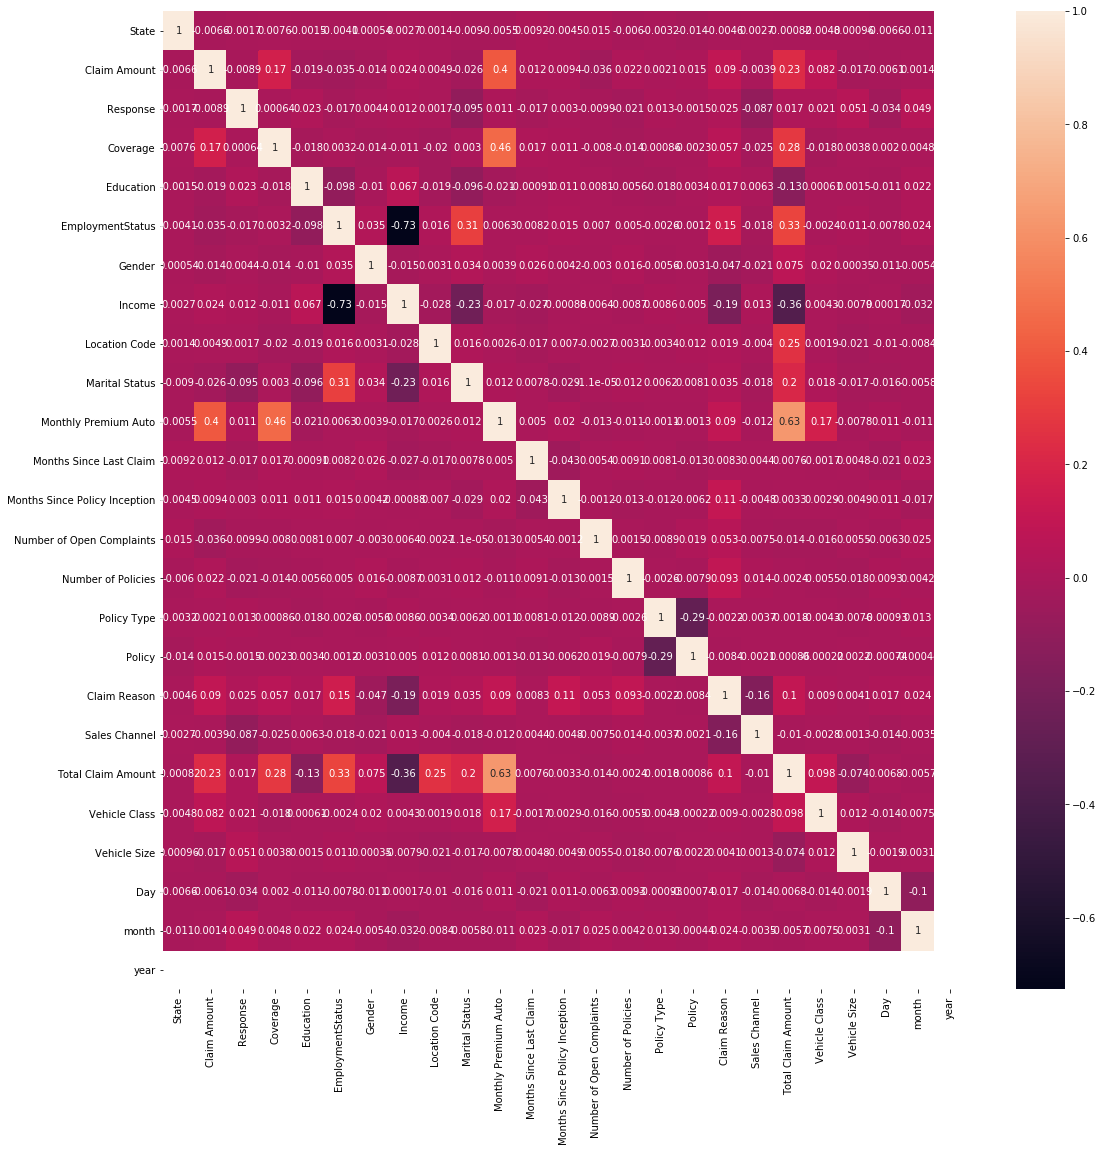

In [57]:
plt.figure(figsize=(18,18))
sns.heatmap(amount.corr(),annot= True)   # not much correlaton among varaibles observed
plt.show()

In [58]:
x.skew()

State                            0.021065
Response                         2.037567
Coverage                         1.031310
Education                        0.508900
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                      1.639408
Policy                          -0.427639
Claim Reason                    -0.269852
Sales Channel                    0.506774
Total Claim Amount               1.714966
Vehicle Class                    0.395146
Vehicle Size                    -0.072742
Day                              0.145359
month                            0.006796
year                             0

State                               AxesSubplot(0.125,0.749828;0.133621x0.130172)
Response                         AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Coverage                          AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Education                        AxesSubplot(0.606034,0.749828;0.133621x0.130172)
EmploymentStatus                 AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Gender                              AxesSubplot(0.125,0.593621;0.133621x0.130172)
Income                           AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Location Code                     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Marital Status                   AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Monthly Premium Auto             AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Months Since Last Claim             AxesSubplot(0.125,0.437414;0.133621x0.130172)
Months Since Policy Inception    AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Number of Open C

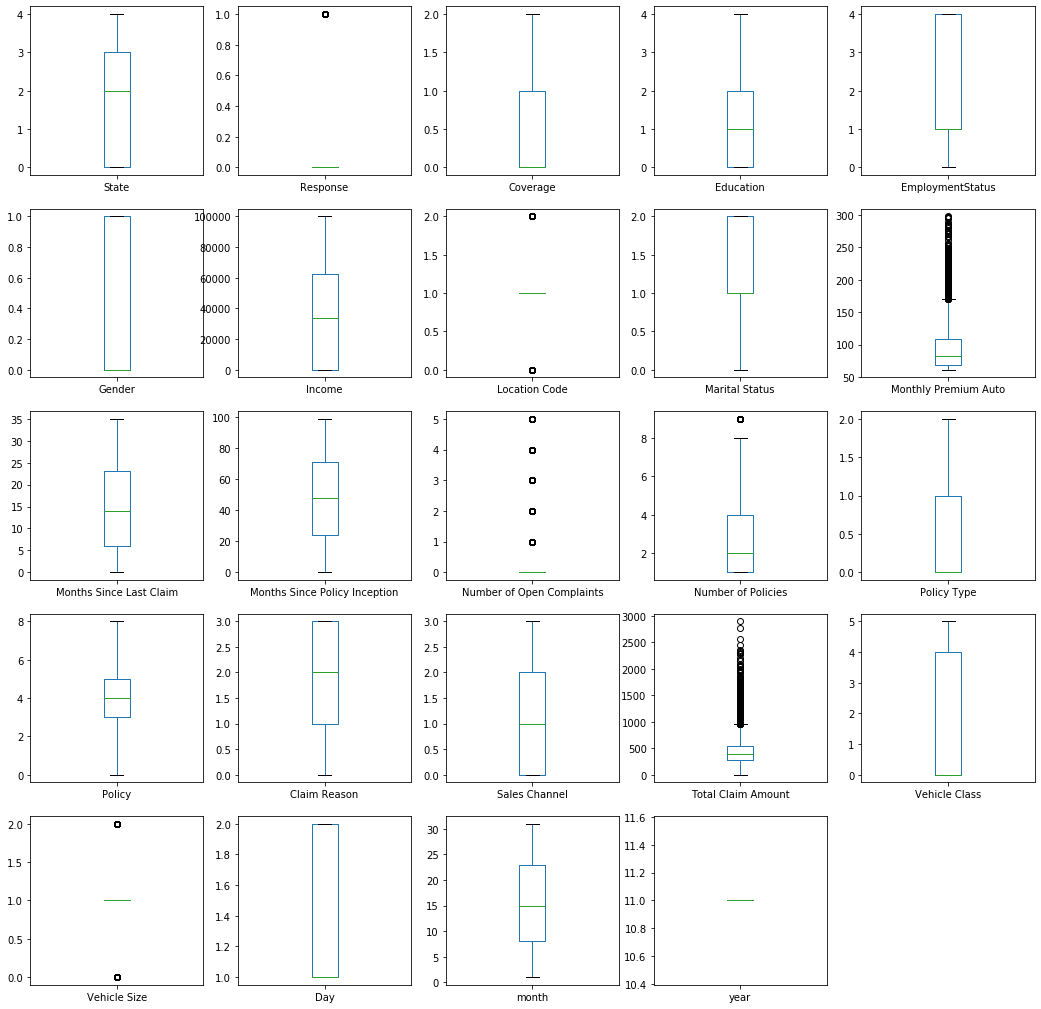

In [59]:
x.plot(kind="box",subplots=True,layout=(5,5),figsize=(18,18))

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

    

In [62]:
x

array([[-0.55068994, -0.40882171, -0.73289946, ...,  1.07530438,
         0.98677607,  0.        ],
       [ 0.97332215, -0.40882171,  0.79199887, ..., -0.92996924,
         1.79571635,  0.        ],
       [ 1.73532819, -0.40882171,  2.31689721, ...,  1.07530438,
         0.40896158,  0.        ],
       ...,
       [ 0.21131611, -0.40882171,  0.79199887, ...,  1.07530438,
        -1.09335608,  0.        ],
       [ 0.21131611, -0.40882171,  0.79199887, ...,  1.07530438,
        -1.44004477,  0.        ],
       [ 0.21131611, -0.40882171,  0.79199887, ...,  1.07530438,
        -0.1688529 ,  0.        ]])

In [63]:

x = pd.DataFrame(x,columns=df_x.columns)

In [64]:
x

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Day,month,year
0,-0.550690,-0.408822,-0.732899,0.658959,-0.612669,-0.980269,0.612827,0.034524,-0.188771,-0.703925,...,1.298568,-1.119497,1.051946,-1.031138,-0.169640,1.499181,0.166682,1.075304,0.986776,0.0
1,0.973322,-0.408822,0.791999,0.658959,1.613313,-0.980269,-1.239617,0.034524,1.381572,0.022691,...,-0.551841,0.748626,0.124129,-1.031138,2.400737,-0.912924,0.166682,-0.929969,1.795716,0.0
2,1.735328,-0.408822,2.316897,0.658959,-0.612669,-0.980269,0.365710,0.034524,-0.188771,0.429596,...,-0.551841,0.748626,1.051946,-1.031138,0.455734,1.499181,0.166682,1.075304,0.408962,0.0
3,0.211316,-0.408822,-0.732899,0.658959,1.613313,1.020128,-1.239617,0.034524,-0.188771,0.371467,...,1.298568,-1.742204,1.051946,0.839080,0.329769,0.534339,0.166682,-0.929969,0.524524,0.0
4,-0.550690,-0.408822,-0.732899,0.658959,-0.612669,1.020128,0.203390,-1.616461,1.381572,-0.587666,...,-0.551841,-0.496789,1.051946,-1.031138,-1.018843,-0.912924,0.166682,1.075304,-1.440045,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.211316,-0.408822,-0.732899,0.658959,-0.612669,1.020128,1.128558,1.685508,-0.188771,-0.587666,...,-0.551841,-0.496789,-0.803688,1.774189,-0.811934,-0.912924,0.166682,1.075304,-0.631104,0.0
9130,0.211316,2.446054,0.791999,-0.267031,-0.612669,-0.980269,-0.528450,0.034524,-1.759114,-0.413278,...,1.298568,-1.119497,1.051946,-0.096029,-0.188956,-0.912924,0.166682,1.075304,-0.399979,0.0
9131,0.211316,-0.408822,0.791999,0.658959,1.613313,1.020128,-1.239617,0.034524,1.381572,-0.238891,...,1.298568,-1.742204,1.051946,-0.096029,1.227937,-0.912924,0.166682,1.075304,-1.093356,0.0
9132,0.211316,-0.408822,0.791999,-0.267031,-0.612669,1.020128,-0.517356,0.034524,-0.188771,0.080820,...,-0.551841,0.125919,0.124129,-0.096029,0.885113,-0.912924,2.027897,1.075304,-1.440045,0.0


In [65]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Day,month,year
0,-0.559025,-0.408822,-0.792225,0.739818,-0.516862,-0.980269,0.676535,0.031159,-0.190493,-0.870344,...,1.678012,-1.109616,1.088787,-1.129106,0.020446,1.369053,0.134681,1.075304,0.986735,0.0
1,0.973395,-0.408822,1.112841,0.739818,1.445285,-0.980269,-1.320057,0.031159,1.383418,0.433066,...,-0.587688,0.730714,0.016595,-1.129106,1.928957,-0.945680,0.134681,-0.929969,1.792661,0.0
2,1.758969,-0.408822,1.650123,0.739818,-0.516862,-0.980269,0.452396,0.031159,-0.190493,0.844752,...,-0.587688,0.730714,1.088787,-1.129106,0.669908,1.369053,0.134681,1.075304,0.410223,0.0
3,0.198942,-0.408822,-0.792225,0.739818,1.445285,1.020128,-1.320057,0.031159,-0.190493,0.795003,...,1.678012,-1.602039,1.088787,0.925053,0.556230,0.705994,0.134681,-0.929969,0.525596,0.0
4,-0.559025,-0.408822,-0.792225,0.739818,-0.516862,1.020128,0.299186,-1.610962,1.383418,-0.605827,...,-0.587688,-0.573794,1.088787,-1.129106,-1.265336,-0.945680,0.134681,1.075304,-1.441650,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.198942,-0.408822,-0.792225,0.739818,-0.516862,1.020128,1.116639,1.691636,-0.190493,-0.605827,...,-0.587688,-0.573794,-0.849262,1.546170,-0.911275,-0.945680,0.134681,1.075304,-0.630248,0.0
9130,0.198942,2.446054,1.112841,-0.156779,-0.516862,-0.980269,-0.468721,0.031159,-1.755777,-0.249737,...,1.678012,-1.109616,1.088787,0.095250,-0.003643,-0.945680,0.134681,1.075304,-0.398707,0.0
9131,0.198942,-0.408822,1.112841,0.739818,1.445285,1.020128,-1.320057,0.031159,1.383418,0.058398,...,1.678012,-1.602039,1.088787,0.095250,1.255081,-0.945680,0.134681,1.075304,-1.093736,0.0
9132,0.198942,-0.408822,1.112841,-0.156779,-0.516862,1.020128,-0.456169,0.031159,-0.190493,0.502649,...,-0.587688,0.031233,0.016595,0.095250,1.014960,-0.945680,2.133226,1.075304,-1.441650,0.0


In [66]:
x.skew()

State                            0.054655
Response                         2.037567
Coverage                         0.516041
Education                        0.088741
EmploymentStatus                 0.136266
Gender                           0.039866
Income                           0.065481
Location Code                    0.026924
Marital Status                  -0.100166
Monthly Premium Auto             0.245532
Months Since Last Claim          0.055075
Months Since Policy Inception    0.008976
Number of Open Complaints        1.458060
Number of Policies               0.319833
Policy Type                      1.115679
Policy                           0.155621
Claim Reason                    -0.113202
Sales Channel                    0.141469
Total Claim Amount               0.013602
Vehicle Class                    0.234585
Vehicle Size                     0.163863
Day                              0.145359
month                            0.003190
year                             0

In [88]:
from sklearn.metrics import r2_score
lr =LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state


In [89]:
r_state= maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [92]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 10}

In [93]:
lr = LinearRegression()
ls=Lasso(alpha=0.1)
rg = Ridge(alpha=0.1)
knr= KNeighborsRegressor(n_neighbors=10)

In [94]:
r_state= maxr2_score(ls,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to

In [95]:
r_state= maxr2_score(rg,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to

In [96]:
r_state= maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [77]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250)

In [98]:
r_state= maxr2_score(gbr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to

In [99]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250],"base_estimator":[lr,ls,DecisionTreeRegressor()]}
fd = GridSearchCV(ada,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 200}

In [80]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=250)

In [81]:
r_state= maxr2_score(ada,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to

In [ ]:
!pip install xgboost

In [82]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
fd = GridSearchCV(xgb,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [84]:
xgb = XGBRegressor(learning_rate=0.1,n_estimators=100)
r_state= maxr2_score(xgb,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001820276CA68>
r2 score corresponding to

In [85]:
 # here xg boosting regressor gives best r2 score at random state  97 hence it is the best algorithm of all the used algorithm


In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=97 ,test_size=0.3)
xgb = XGBRegressor(learning_rate=0.1,n_estimators=100)
xgb.fit(x_train,y_train)
y_pred = gbr.predict(x_test)

In [102]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score:",r2_score(y_test,y_pred)*100)

RMSE is: 327.91939528364037
r2 score: 75.83564337365306


In [103]:
from sklearn.externals import joblib
joblib.dump(xgb,"Insurance Amount.obj")

['Insurance Amount.obj']

In [104]:
model=joblib.load('Insurance Amount.obj')

In [105]:
model.predict(x_test)

array([ 296.56253,  714.48706, 1147.5582 , ...,  834.4107 ,  264.95544,
        635.7363 ], dtype=float32)